In [1]:
import pyodbc
import numpy as np
import pandas as pd
from datetime import date, timedelta, datetime
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import seaborn as sns
import locale
#import matplotlib

In [2]:
df = pd.read_csv('supermarket_sales.csv', sep=',', encoding = "utf-8")

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df_prod_line = pd.DataFrame()
for prod_line in df['Product line'].unique():
    sales_m = df.loc[(df['Product line'] == prod_line) & (df['Gender'] == 'Male'), 'Total'].sum()
    sales_f = df.loc[(df['Product line'] == prod_line) & (df['Gender'] == 'Female'), 'Total'].sum()
    row = pd.Series({'Product_Line': prod_line,'Sales_M': sales_m, 'Sales_F': sales_f })
    df_prod_line = df_prod_line.append(row, ignore_index=True)
df_prod_line = df_prod_line.set_index('Product_Line')

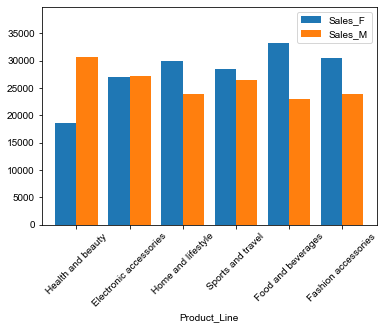

In [5]:
ax = df_prod_line.plot( kind= 'bar' , secondary_y= 'Sales Male' , rot= 45, width=0.8)
ax.set_ylim([0,df_prod_line['Sales_F'].max()*1.2])

sns.set()
plt.show()

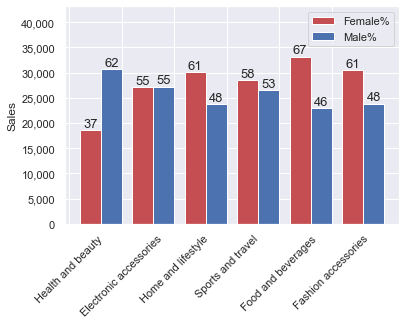

In [6]:
import matplotlib
from matplotlib import ticker 

ind = np.arange(len(df_prod_line))
width = 0.4

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = list(df_prod_line['Sales_F'])
rects1 = ax.bar(ind, yvals, width, color='r')
zvals = list(df_prod_line['Sales_M'])
rects2 = ax.bar(ind+width, zvals, width, color='b')

ax.set_ylabel('Sales')
ax.set_ylim([0,df_prod_line['Sales_F'].max()*1.3]) 
ax.set_xticks(ind+width-0.8)
ax.set_xticklabels(df_prod_line.index)
ax.legend( (rects1[0], rects2[0]), ('Female%', 'Male%') )
ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

def autolabel(rects):
    idx = 0
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.0*h, '%d'%int((h/df_prod_line.iloc[idx].sum())*100),
                ha='center', va='bottom', fontsize=13)
        
autolabel(rects1)
autolabel(rects2)
plt.xticks(rotation=45)
plt.show()

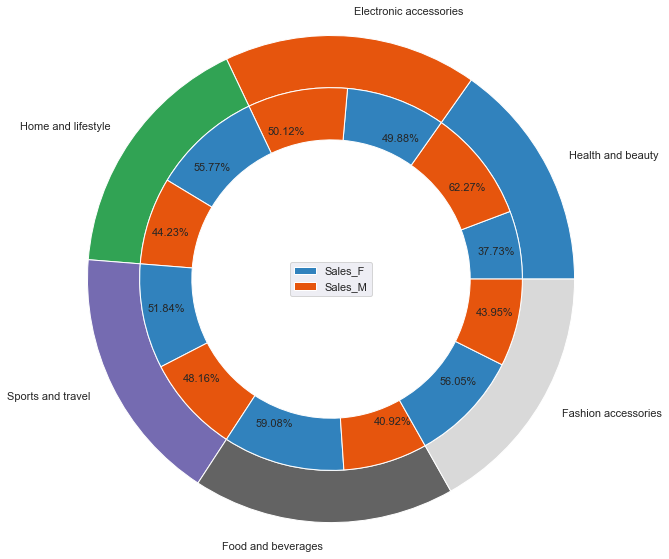

In [7]:
fig, ax = plt.subplots(figsize=(8,8))

size = 0.3

vals= []
for i in range(0,len(df_prod_line)):
    vals.append([df_prod_line['Sales_F'][i],df_prod_line['Sales_M'][i]])
vals = np.array(vals)

inner_labels = []
for idx in range(len(df_prod_line)):
    f = str(round((df_prod_line['Sales_F'][idx] / df_prod_line.iloc[idx].sum()) * 100,2)) + "%" 
    m = str(round((df_prod_line['Sales_M'][idx] / df_prod_line.iloc[idx].sum()) * 100,2)) + "%" 
    inner_labels.append(f)
    inner_labels.append(m)

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(len(df_prod_line))*4)
inner_colors = cmap(np.array([0, 4]))

ax.pie(vals.sum(axis=1), radius=1.4, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labeldistance=1.1,labels=df_prod_line.index)

ax.pie(vals.flatten(), radius=1.4-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'),labels=inner_labels,labeldistance=0.78)

plt.legend(df_prod_line.columns, loc='best')
#ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()

In [8]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [9]:
import datetime as dt

In [16]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Month'] = df['Date'].dt.month

In [23]:
sales_per_month = pd.DataFrame()
for month in df['Month'].unique():
    sum_month = df.loc[df['Month'] == month,'Total'].sum()
    row = pd.Series({'Month': month, 'Total': sum_month})
    sales_per_month = sales_per_month.append(row, ignore_index=True)

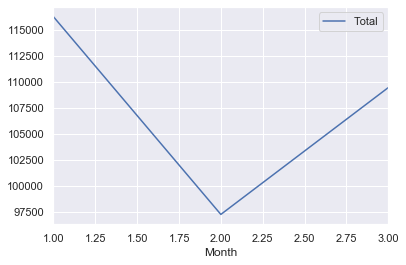

In [27]:
sales_per_month.sort_values(by='Month').plot.line(x='Month', y='Total')

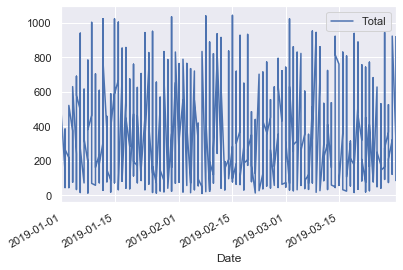

In [30]:
df.sort_values(by='Date').plot.line(x='Date', y='Total')